In [119]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import pearsonr, chi2_contingency, mode

<h3>El propisto de esta seccion es analizar (Group Age - Segmento)</h3>

Group Age -> Grupos de edad de cada cliente

Segmento -> Segmentacion de biciletas de acuerdo a su precio 

Rango de precios usados en segmentacion ->

    •	Low End (540 – 1552)

    •	Medium End (1553 – 2564)
    
    •	High End (2565 – 3576)


In [120]:
df = pd.read_csv("Sales.csv")

In [121]:
# Funcion para agregar segmentacion a cada renglon 
def bike_segment_fun(x):

    if x > 500 and x <= 1552:
        return "Low End"

    elif x > 1552 and x < 2564:
        return "Medium End"
        
    elif x > 2564:
        return "High End"

In [122]:
# Crear df solo con ventas categorizadas como bicicletas 
df = df[df.Product_Category == "Bikes"]

In [123]:
# Aplicar funcion bike_segment_fun a df, nombre de nueva columna Bike_Segmentation
df["Bike_Segmentation"] = df.Unit_Price.apply(bike_segment_fun)

<Figure size 432x288 with 0 Axes>

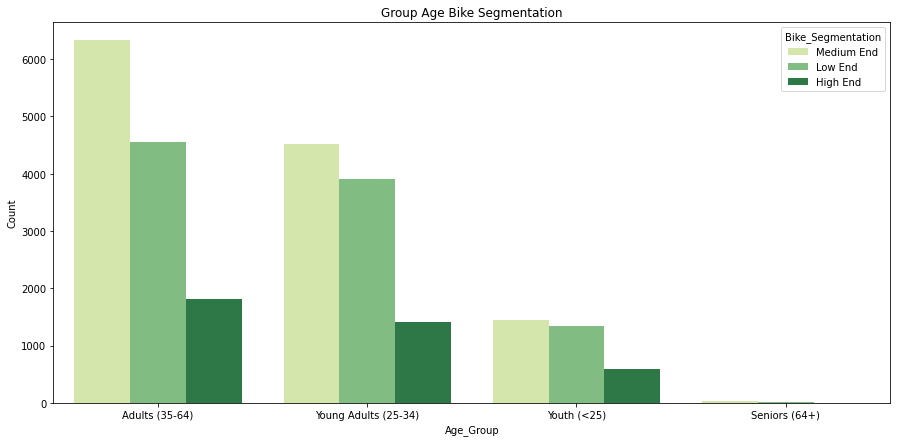

In [124]:
# Analizar cada Group Age con sus porcentajes de Bike Segmentation
age_group_bike_seg = pd.DataFrame(df.groupby("Age_Group").Bike_Segmentation.value_counts())

# Crear una sola tabla, incluir index en valores
temp_df = age_group_bike_seg.index

count = age_group_bike_seg["Bike_Segmentation"].values
age_group = []
bike_segmentation = []

for value in temp_df:
    age_group.append(value[0])
    bike_segmentation.append(value[1])

dicc_age_bike_seg = {"Age_Group": age_group, "Bike_Segmentation": bike_segmentation, "Count": count}

df_age_bike = pd.DataFrame.from_dict(dicc_age_bike_seg)

plt.clf()
fig, axes = plt.subplots(figsize = (15, 7))
order_table =  ["Adults (35-64)", "Young Adults (25-34)", "Youth (<25)", "Seniors (64+)"]
sns.barplot(data = df_age_bike, x = "Age_Group", y = "Count", hue = "Bike_Segmentation", order = order_table, palette = "YlGn")
axes.set_title("Group Age Bike Segmentation")
plt.show()

<h3>El proposito de esta seccion es analizar (Group Age - Subcategoria)</h3>

Group Age -> Grupo de edad de cada cliente

Subcategoria -> Categorias de bicicletas

Tipos de subcategorias ->

    •	Road Bike

    •	Mountain Bike
    
    •	Touring Bike


<Figure size 432x288 with 0 Axes>

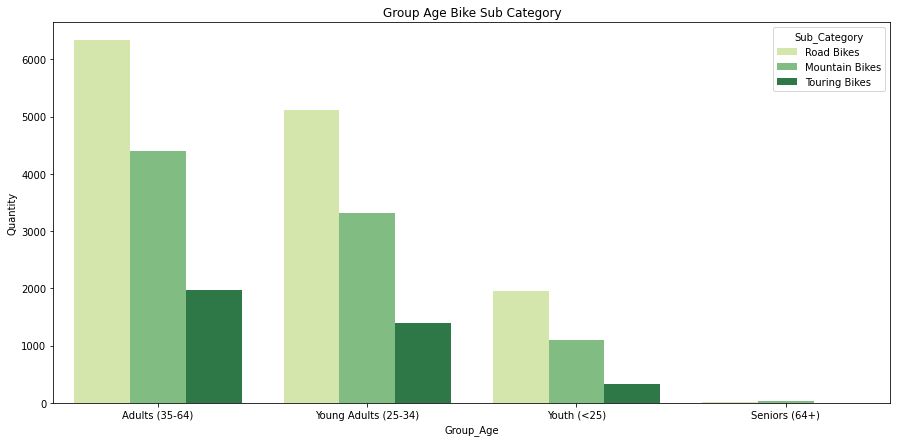

In [125]:
# Analizar cada Group Age con su procentaje de Subcategorias 
age_group_subcat = pd.DataFrame(df.groupby("Age_Group").Sub_Category.value_counts())

# Crear una sola tabla incluir index en los valores
index_values = age_group_subcat.index
quantity = age_group_subcat["Sub_Category"].values
group_age = []
sub_cat = []

for value in index_values:
    group_age.append(value[0])
    sub_cat.append(value[1])

dicc_age_subcat = {"Group_Age": group_age, "Sub_Category": sub_cat, "Quantity": quantity}

df_age_subcat = pd.DataFrame.from_dict(dicc_age_subcat)

plt.clf()
fig, axes = plt.subplots(figsize = (15, 7))
sns.barplot(data = df_age_subcat, x = "Group_Age", y ="Quantity", hue = "Sub_Category", order = order_table, palette = "YlGn")
axes.set_title("Group Age Bike Sub Category")
plt.show()

<h3>El proposito de esta seccion es analizar la linea de tiempo respecto a las ventas</h3>
Tiempo -> Fecha en la que la venta fue realizada

Ventas -> Monto total de la venta realziada en la fecha

In [126]:
# Realizar diferentes tablas para cada ano o unir en una para predecir ventas 

# Total de anos dentro de mi df
print("Anos Totales: ", df.Year.unique())

df_timeline = list(df.groupby("Year"))

Anos Totales:  [2013 2015 2014 2016 2012 2011]


<Figure size 432x288 with 0 Axes>

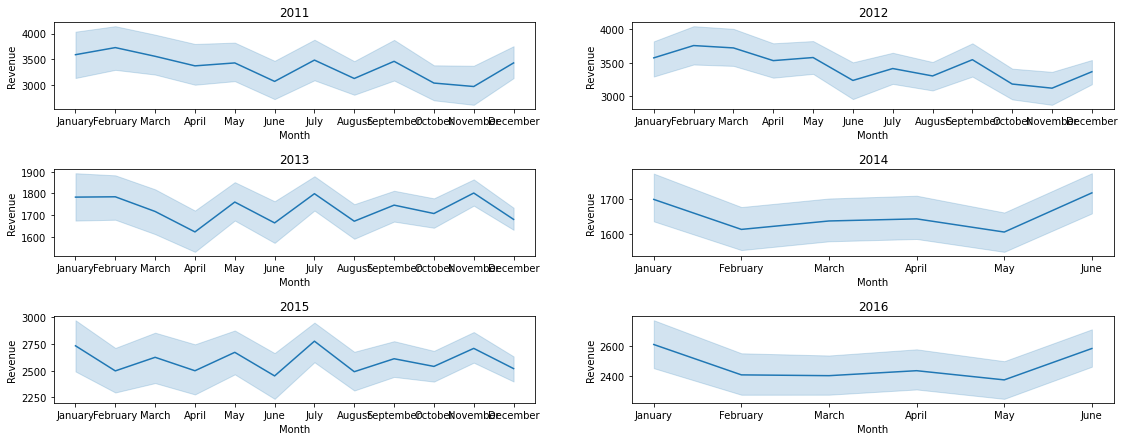

In [155]:
# Iteracion por cada ano haciendo una grafica
plt.clf()

fig, axes = plt.subplots(3, 2, figsize = (19, 7))

i = 0
j = 0

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

for year, df in df_timeline:
    if j == 2:
        i += 1
        j = 0

    # Creamos una serie de tipo categoria anted de darle su orden
    df.Month = pd.Series(df.Month).astype("category")

    # Creamos o mejor dicho damos los valores en orden 
    df.Month = df.Month.cat.set_categories(ordered_months, ordered = True)

    sns.lineplot(ax = axes[i][j], data = df, x = "Month", y = "Revenue")
        
    axes[i][j].set_title(year)

    months = df.Month.unique()

    months = list(months.sort_values())

    # axes[i][j].set_xticklabels(labels = df.Month, rotation = 50)

    j += 1

plt.subplots_adjust(hspace = 0.7)
    
plt.show()   
